### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [5]:
resume_data = pd.read_csv('resume_dataset.csv', encoding = 'utf-8')

In [6]:
resume_data.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [7]:
# create a new column called structured resume
resume_data['structured_resume'] = ''
resume_data.head()

,Category,Resume,structured_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [8]:
# unique categories represented in the resumes
print("Display categories represented in the resumes")
print(resume_data['Category'].unique())

Display categories represented in the resumes
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [9]:
# displaying categories and number of records present
result = resume_data['Category'].value_counts()
print(result)

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
ETL Developer                40
Blockchain                   40
Sales                        40
Operations Manager           40
Data Science                 40
Mechanical Engineer          40
Arts                         36
Database                     33
Health and fitness           30
Electrical Engineering       30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


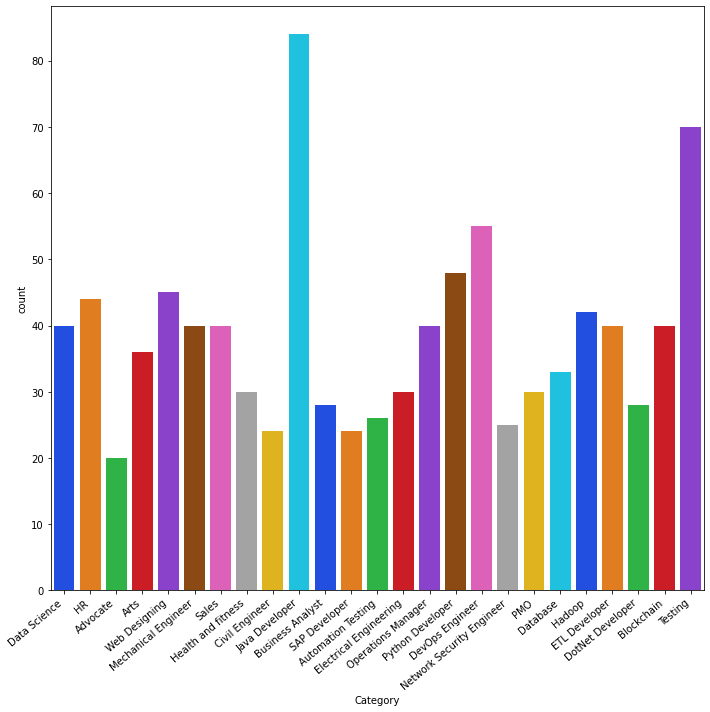

In [11]:
# plot of category vs value counts
import seaborn as sns
plt.figure(figsize=(10, 10))
ax = sns.countplot(x = 'Category', data = resume_data, palette = "bright")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.tight_layout()
plt.show()

In [13]:
# plotting pie chart using matplotlib
from matplotlib.gridspec import GridSpec
targetCount = resume_data['Category'].value_counts()
targetLabel = resume_data['Category'].unique()

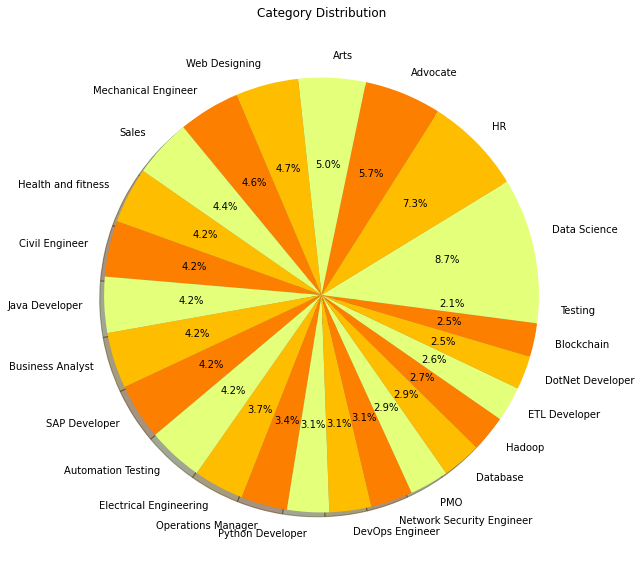

In [14]:
# making square figures and axes
plt.figure(1, figsize=(22, 22))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap("Wistia")
colors = [cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(the_grid[0, 1], aspect=1, title='Category Distribution')
source_pie = plt.pie(targetCount, labels=targetLabel, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()


### Importing Library for NLP & Preprocessing Data

In [15]:
import re # this is for regular expressions when we are trying to manipulate the text
import nltk #library used for nlp products
from nltk.corpus import stopwords # here we are importing the stopwords to be used for the texts
# cleaning resume
def cleaning_resume(text):
    '''cleans and removes all the unnecessary parts using regular expression'''
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs in the text
    text = re.sub('@\S+', '  ', text)  # remove mentions in the text
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations in the text
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc in the text
    text = re.sub('#\S+', '', text)  # remove hashtags in the text
    text = re.sub(r'[^\x00-\x7f]',r' ',text) 
    text = re.sub('\s+', ' ', text)  # remove extra whitespace in the text
    return text


In [16]:
resume_data['structured_resume'] = resume_data.Resume.apply(lambda x: cleaning_resume(x))

In [18]:
!pip install wordcloud

In [19]:

#Importing Wordcloud library
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to C:\Users\Cash
[nltk_data]     Crusaders\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Cash
[nltk_data]     Crusaders\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [23]:
#cleaning the sentences
import string
set_all_stopwords = set(stopwords.words('english')+['``',"''"]) # makes sure that the stopwords are from the english langauge
total_words =[]
sentences = resume_data['Resume'].values # get the resume data
cleaned_sentences = "" # all the cleaned senteces will be stored here

for i in range(0,160):
    cleaned_text = cleaning_resume(sentences[i]) # cleaning the resume data one at the time
    cleaned_sentences += cleaned_text # add the cleaned text to the cleaned sentences
    required_text = nltk.word_tokenize(cleaned_text) # seperate or split the cleaned text
    for word in required_text:
        if word not in set_all_stopwords and word not in string.punctuation:
            total_words.append(word)


In [24]:
# using wordcloud to count frequency of words
word_frequency_dist = nltk.FreqDist(total_words) # counts the frequencies of the words in total words
most_common = word_frequency_dist.most_common(50)
print(most_common)


[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


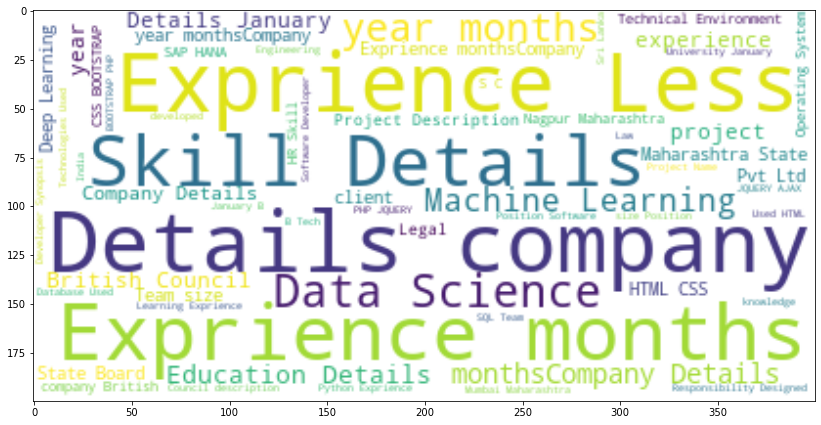

In [28]:
# plotting the frequency of words using wordcloud so that most frequent words can appear in bold, different colours
word_cloud = WordCloud(background_color = 'white').generate(cleaned_sentences)
plt.figure(figsize=(14, 14))
plt.imshow(word_cloud, interpolation="bilinear")
#plt.axes("off")
plt.show()

In [29]:
# importing sklearn libraries
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder

### Converting words to categorical values

In [33]:
category = ['Category']
le = LabelEncoder()
for word in category:
    resume_data[word]=le.fit_transform(resume_data[word])

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
required_text = resume_data['structured_resume'].values # get the data that si structured from structured column
required_target = resume_data['Category'].values # get the categories from the category column
word_vectorizer = TfidfVectorizer(sublinear_tf = True, stop_words="english", max_features = 1500) # initialize the tfid vect
word_vectorizer.fit(required_text) # calculate and check all the stop words that are gonna be removed
word_features = word_vectorizer.transform(required_text) # do the opration of removing stop words  from the texts
print("Feature Completed")

Feature Completed


In [38]:
#Splitting training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(word_features, required_target, random_state=42, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


In [41]:
#training the model and printing the classification report
#Here we are using the one vs the rest classifier KNeighborsClassifier
classifier = OneVsRestClassifier(KNeighborsClassifier())
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

print("KNeighbors Classifier")
print('Accuracy on training dataset: {:.2f}'.format(classifier.score(X_train, y_train)))
print('Accuracy on test dataset: {:.2f}'.format(classifier.score(X_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

KNeighbors Classifier
Accuracy on training dataset: 0.99
Accuracy on test dataset: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      0.60      0.75         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00    